# GRIP : The Sparks Foundation
# Data Science and Business Analyst Intern
# Task 1 : Prediction using Supervised ML
# Author : Harshitha Ayenugula

In this task we have to predict the percentage score of a student based on the number of hours studied. This can be solved using simple linear regression

In [1]:
#Importing necessary libraries for Analysis

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import seaborn as sas

import warnings
warnings.filterwarnings("ignore")

# Reading data

In [2]:
url="https://bit.ly/w-data"
data=pd.read_csv(url)

# Exploring data

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking whether duplicates are present

In [7]:
rmv_dup=data.duplicated()
print('No. of Duplicates:'+ str(rmv_dup.sum))

No. of Duplicates:<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


# Exploratory Data Analysis

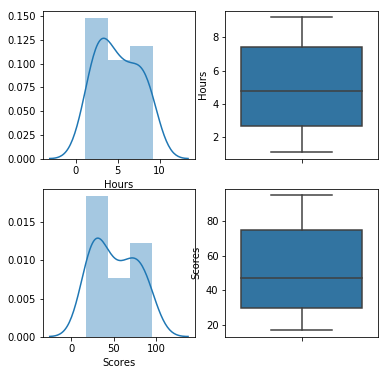

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sas.distplot(data['Hours'], ax=axes[0][0])
a=sas.boxplot(data['Hours'], orient='v',ax=axes[0][1])

a=sas.distplot(data['Scores'], ax=axes[1][0])
a=sas.boxplot(data['Scores'], orient='v',ax=axes[1][1])

plt.show()

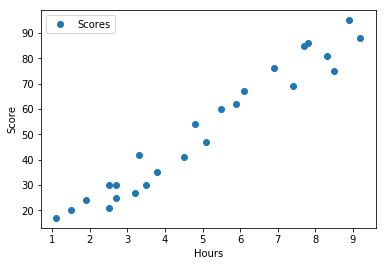

In [15]:
#Distribution of scores

data.plot(x='Hours', y='Scores', style='o')    
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

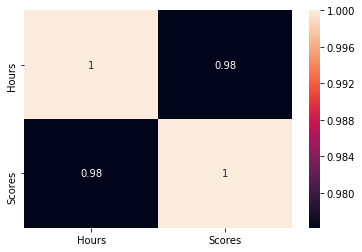

In [14]:
#Checking correlation

sas.heatmap(data.corr(),annot=True)
plt.show()

# Linear regression

In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
#Training linear regression model 

from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Done with training.")

Done with training.


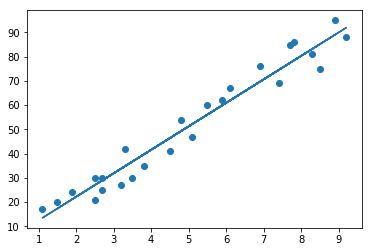

In [21]:
#Plotting the regression line

m=lr.coef_
c=lr.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [22]:
#Checking accuracy

print("Training Score:",lr.score(X_train,y_train)*100)
print("Testing Score:",lr.score(X_test,y_test)*100)

Training Score: 94.91209376364417
Testing Score: 96.78055545167994


# Predicting the scores

In [23]:
# predicting the scores
y_pred = lr.predict(X_test) 
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [24]:
# Actual vs Predicted comparsion
ac_prediction=pd.DataFrame({'Actual' : y_test ,'Predicted':y_pred})
ac_prediction

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [25]:
#Predicting if he/she studies for 9.25 hours per day
hours = 9.25
own_pred = lr.predict([[hours]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 92.38611528261494


 If a student studies for 9.25 hours per day she/he will score 92.38611528261494 % in exam

# Model evaluation

In [26]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272


Since Mean Absolute Error is less and since we have good R-square value, we can say that the model doing great linear model

# Conclusion

We got predicted the score around 92 based on the study hours i.e., 9.25 hrs/day

# END